In [2]:
#Load packages
import xarray as xr
import pickle
from scipy import stats
from scipy import *
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [11]:
#Loading trajectories
ds1=xr.open_dataset('/work/bb1018/b380723/0.8/1m/outtrace1.nc')
ds2=xr.open_dataset('/work/bb1018/b380723/0.4/1m/outtrace1.nc')
ds3=xr.open_dataset('/work/bb1018/b380723/0.2/1m/outtrace1.nc')
ds4=xr.open_dataset('/work/bb1018/b380723/0.1convon/1m/outtrace1.nc')
ds5=xr.open_dataset('/work/bb1018/b380723/0.05convon/1m/outtrace1.nc')
ds6=xr.open_dataset('/work/bb1018/b380723/0.025convon/1m/outtrace1.nc')
ds7=xr.open_dataset('/work/bb1018/b380723/0.1convoff/1m/outtrace1.nc') 
ds8=xr.open_dataset('/work/bb1018/b380723/0.05convoff/1m/outtrace1.nc')
ds9=xr.open_dataset('/work/bb1018/b380723/0.025convoff/1m/outtrace1.nc')

#computing statistics

#creating empty arrays for saving calculations
#abbreviations used- 
# map- main ascent period; mah- main ascent height 

maxiarg=xr.full_like(ds1.P[0,:], np.nan)
miniarg=xr.full_like(ds1.P[0,:], np.nan)
mapi=xr.full_like(ds1.P[0,:], np.nan)
maxi=xr.full_like(ds1.P[0,:], np.nan)
mini=xr.full_like(ds1.P[0,:], np.nan)
mah=xr.full_like(ds1.P[0,:], np.nan)

#main ascent period (map) and ascent height (mah) during main ascent period for each trajectory
ntim = np.arange(0,49,1)
for i in range(ds1.P.ntra.size):
    maxiarg[i]=ds1.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmax(fill_value=None)
    miniarg[i]=ds1.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmin(fill_value=None)
    mapi[i]=miniarg[i]-maxiarg[i] #main ascent period
    
    mah[i]=ds1.P[maxiarg[i].astype(int).values,i]-ds1.P[miniarg[i].astype(int).values,i] #ascent height during main ascent period

#ascent rate for each trajectory
P=xr.full_like(ds1.P, np.nan)
for i in range(ds1.P.ntra.size):
    for j in range(maxiarg[i].astype(int).values,miniarg[i].astype(int).values,1):
        P[j,i]=-(ds1.P[j+1,i]-ds1.P[j,i]) #ascent rate during main ascent periof

#Calculating and saving mean MAP, minimum MAP, maximum MAP, mean ascent height, mean ascent rate over all trajectories
resulttrajtot_a=[mapi.mean(),mapi.min(),mapi.max(),mah.mean(),P.mean()]
#########################################################

maxiarg=xr.full_like(ds2.P[0,:], np.nan)
miniarg=xr.full_like(ds2.P[0,:], np.nan)
mapi=xr.full_like(ds2.P[0,:], np.nan)
maxi=xr.full_like(ds2.P[0,:], np.nan)
mini=xr.full_like(ds2.P[0,:], np.nan)
mah=xr.full_like(ds2.P[0,:], np.nan)

ntim = np.arange(0,49,1)
for i in range(ds2.P.ntra.size):
    maxiarg[i]=ds2.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmax(fill_value=None)
    miniarg[i]=ds2.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmin(fill_value=None)
    mapi[i]=miniarg[i]-maxiarg[i]
    
    mah[i]=ds2.P[maxiarg[i].astype(int).values,i]-ds2.P[miniarg[i].astype(int).values,i]
    
P=xr.full_like(ds2.P, np.nan)
for i in range(ds2.P.ntra.size):
    for j in range(maxiarg[i].astype(int).values,miniarg[i].astype(int).values,1):
        P[j,i]=-(ds2.P[j+1,i]-ds2.P[j,i])

resulttrajtot_b=[mapi.mean(),mapi.min(),mapi.max(),mah.mean(),P.mean()]
#########################################################

maxiarg=xr.full_like(ds3.P[0,:], np.nan)
miniarg=xr.full_like(ds3.P[0,:], np.nan)
mapi=xr.full_like(ds3.P[0,:], np.nan)
maxi=xr.full_like(ds3.P[0,:], np.nan)
mini=xr.full_like(ds3.P[0,:], np.nan)
mah=xr.full_like(ds3.P[0,:], np.nan)

ntim = np.arange(0,49,1)
for i in range(ds3.P.ntra.size):
    maxiarg[i]=ds3.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmax(fill_value=None)
    miniarg[i]=ds3.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmin(fill_value=None)
    mapi[i]=miniarg[i]-maxiarg[i]
    
    mah[i]=ds3.P[maxiarg[i].astype(int).values,i]-ds3.P[miniarg[i].astype(int).values,i]

P=xr.full_like(ds3.P, np.nan)
for i in range(ds3.P.ntra.size):
    for j in range(maxiarg[i].astype(int).values,miniarg[i].astype(int).values,1):
        P[j,i]=-(ds3.P[j+1,i]-ds3.P[j,i])

resulttrajtot_c=[mapi.mean(),mapi.min(),mapi.max(),mah.mean(),P.mean()]
##########################################################

maxiarg=xr.full_like(ds4.P[0,:], np.nan)
miniarg=xr.full_like(ds4.P[0,:], np.nan)
mapi=xr.full_like(ds4.P[0,:], np.nan)
maxi=xr.full_like(ds4.P[0,:], np.nan)
mini=xr.full_like(ds4.P[0,:], np.nan)
mah=xr.full_like(ds4.P[0,:], np.nan)

ntim = np.arange(0,49,1)
for i in range(ds4.P.ntra.size):
    maxiarg[i]=ds4.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmax(fill_value=None)
    miniarg[i]=ds4.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmin(fill_value=None)
    mapi[i]=miniarg[i]-maxiarg[i]
    
    mah[i]=ds4.P[maxiarg[i].astype(int).values,i]-ds4.P[miniarg[i].astype(int).values,i]

P=xr.full_like(ds4.P, np.nan)
for i in range(ds4.P.ntra.size):
    for j in range(maxiarg[i].astype(int).values,miniarg[i].astype(int).values,1):
        P[j,i]=-(ds4.P[j+1,i]-ds4.P[j,i])

resulttrajtot_d=[mapi.mean(),mapi.min(),mapi.max(),mah.mean(),P.mean()]
#######################################################

maxiarg=xr.full_like(ds5.P[0,:], np.nan)
miniarg=xr.full_like(ds5.P[0,:], np.nan)
mapi=xr.full_like(ds5.P[0,:], np.nan)
maxi=xr.full_like(ds5.P[0,:], np.nan)
mini=xr.full_like(ds5.P[0,:], np.nan)
mah=xr.full_like(ds5.P[0,:], np.nan)

ntim = np.arange(0,49,1)
for i in range(ds5.P.ntra.size):
    maxiarg[i]=ds5.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmax(fill_value=None)
    miniarg[i]=ds5.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmin(fill_value=None)
    mapi[i]=miniarg[i]-maxiarg[i]
    
    mah[i]=ds5.P[maxiarg[i].astype(int).values,i]-ds5.P[miniarg[i].astype(int).values,i]

P=xr.full_like(ds5.P, np.nan)
for i in range(ds5.P.ntra.size):
    for j in range(maxiarg[i].astype(int).values,miniarg[i].astype(int).values,1):
        P[j,i]=-(ds5.P[j+1,i]-ds5.P[j,i])

resulttrajtot_e=[mapi.mean(),mapi.min(),mapi.max(),mah.mean(),P.mean()]
##########################################################

maxiarg=xr.full_like(ds6.P[0,:], np.nan)
miniarg=xr.full_like(ds6.P[0,:], np.nan)
mapi=xr.full_like(ds6.P[0,:], np.nan)
maxi=xr.full_like(ds6.P[0,:], np.nan)
mini=xr.full_like(ds6.P[0,:], np.nan)
mah=xr.full_like(ds6.P[0,:], np.nan)

ntim = np.arange(0,49,1)
for i in range(ds6.P.ntra.size):
    maxiarg[i]=ds6.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmax(fill_value=None)
    miniarg[i]=ds6.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmin(fill_value=None)
    mapi[i]=miniarg[i]-maxiarg[i]
    
    mah[i]=ds6.P[maxiarg[i].astype(int).values,i]-ds6.P[miniarg[i].astype(int).values,i]
    
P=xr.full_like(ds6.P, np.nan)
for i in range(ds6.P.ntra.size):
    for j in range(maxiarg[i].astype(int).values,miniarg[i].astype(int).values,1):
        P[j,i]=-(ds6.P[j+1,i]-ds6.P[j,i])

resulttrajtot_f=[mapi.mean(),mapi.min(),mapi.max(),mah.mean(),P.mean()]
#########################################################

maxiarg=xr.full_like(ds7.P[0,:], np.nan)
miniarg=xr.full_like(ds7.P[0,:], np.nan)
mapi=xr.full_like(ds7.P[0,:], np.nan)
maxi=xr.full_like(ds7.P[0,:], np.nan)
mini=xr.full_like(ds7.P[0,:], np.nan)
mah=xr.full_like(ds7.P[0,:], np.nan)

ntim = np.arange(0,49,1)
for i in range(ds7.P.ntra.size):
    maxiarg[i]=ds7.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmax(fill_value=None)
    miniarg[i]=ds7.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmin(fill_value=None)
    mapi[i]=miniarg[i]-maxiarg[i]
    
    mah[i]=ds7.P[maxiarg[i].astype(int).values,i]-ds7.P[miniarg[i].astype(int).values,i]
    
P=xr.full_like(ds7.P, np.nan)
for i in range(ds7.P.ntra.size):
    for j in range(maxiarg[i].astype(int).values,miniarg[i].astype(int).values,1):
        P[j,i]=-(ds7.P[j+1,i]-ds7.P[j,i])

resulttrajtot_g=[mapi.mean(),mapi.min(),mapi.max(),mah.mean(),P.mean()]
#########################################################

maxiarg=xr.full_like(ds8.P[0,:], np.nan)
miniarg=xr.full_like(ds8.P[0,:], np.nan)
mapi=xr.full_like(ds8.P[0,:], np.nan)
maxi=xr.full_like(ds8.P[0,:], np.nan)
mini=xr.full_like(ds8.P[0,:], np.nan)
mah=xr.full_like(ds8.P[0,:], np.nan)

ntim = np.arange(0,49,1)
for i in range(ds8.P.ntra.size):
    maxiarg[i]=ds8.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmax(fill_value=None)
    miniarg[i]=ds8.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmin(fill_value=None)
    mapi[i]=miniarg[i]-maxiarg[i]
    
    mah[i]=ds8.P[maxiarg[i].astype(int).values,i]-ds8.P[miniarg[i].astype(int).values,i]

P=xr.full_like(ds8.P, np.nan)
for i in range(ds8.P.ntra.size):
    for j in range(maxiarg[i].astype(int).values,miniarg[i].astype(int).values,1):
        P[j,i]=-(ds8.P[j+1,i]-ds8.P[j,i])
    
resulttrajtot_h=[mapi.mean(),mapi.min(),mapi.max(),mah.mean(),P.mean()]

##########################################################

maxiarg=xr.full_like(ds9.P[0,:], np.nan)
miniarg=xr.full_like(ds9.P[0,:], np.nan)
mapi=xr.full_like(ds9.P[0,:], np.nan)
maxi=xr.full_like(ds9.P[0,:], np.nan)
mini=xr.full_like(ds9.P[0,:], np.nan)
mah=xr.full_like(ds9.P[0,:], np.nan)

ntim = np.arange(0,49,1)
for i in range(ds9.P.ntra.size):
    maxiarg[i]=ds9.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmax(fill_value=None)
    miniarg[i]=ds9.assign_coords(ntim=("ntim", ntim)).P[:,i].idxmin(fill_value=None)
    mapi[i]=miniarg[i]-maxiarg[i]
    
    mah[i]=ds9.P[maxiarg[i].astype(int).values,i]-ds9.P[miniarg[i].astype(int).values,i]

P=xr.full_like(ds9.P, np.nan)
for i in range(ds9.P.ntra.size):
    for j in range(maxiarg[i].astype(int).values,miniarg[i].astype(int).values,1):
        P[j,i]=-(ds9.P[j+1,i]-ds9.P[j,i])

resulttrajtot_i=[mapi.mean(),mapi.min(),mapi.max(),mah.mean(),P.mean()]

##############################################################################
#saving calculations of all statistics for all resolutions

resulttrajtot=[resulttrajtot_a,resulttrajtot_b,resulttrajtot_c,resulttrajtot_d,resulttrajtot_e,resulttrajtot_f,resulttrajtot_g,resulttrajtot_h,resulttrajtot_i,]

with open("trajtot_stat_unfiltered_1m.pkl","wb") as f:
    pickle.dump(resulttrajtot,f)

In [3]:
#loading saved calculation

with open("/work/bb1018/b380723/figures/p_1m/trajtot_stat_unfiltered_1m.pkl","rb") as f:
    trajtot = pickle.load(f)
    
resulttrajtot_a=trajtot[0]
resulttrajtot_b=trajtot[1]
resulttrajtot_c=trajtot[2]
resulttrajtot_d=trajtot[3]
resulttrajtot_e=trajtot[4]
resulttrajtot_f=trajtot[5]
resulttrajtot_g=trajtot[6]
resulttrajtot_h=trajtot[7]
resulttrajtot_i=trajtot[8]

with open("/work/bb1018/b380723/figures/p_1m/trajtot_stat_unfiltered_2m.pkl","rb") as f:
    trajtot2m = pickle.load(f)
    
resulttrajtot2m_a=trajtot2m[0]
resulttrajtot2m_b=trajtot2m[1]
resulttrajtot2m_c=trajtot2m[2]
resulttrajtot2m_d=trajtot2m[3]
resulttrajtot2m_e=trajtot2m[4]
resulttrajtot2m_f=trajtot2m[5]
resulttrajtot2m_g=trajtot2m[6]
resulttrajtot2m_h=trajtot2m[7]
resulttrajtot2m_i=trajtot2m[8]

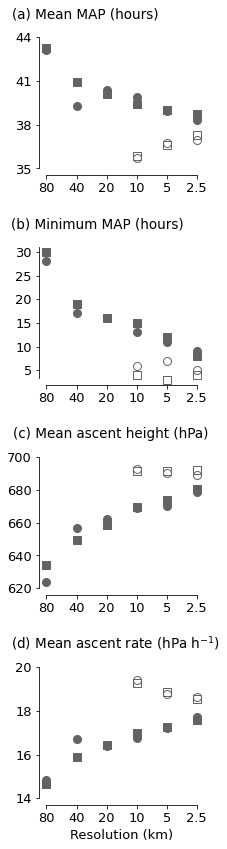

In [4]:
plt.figure(figsize=(7,14))
plt.rcParams.update({'font.size': 13})
plt.subplots_adjust(hspace = 0.6, wspace=0.6)


########################################mean MAP############################

ax= plt.subplot(421)

x1=['80','40','20','10','5','2.5']
trajtot=[resulttrajtot_a[0], resulttrajtot_b[0], resulttrajtot_c[0], resulttrajtot_d[0], resulttrajtot_e[0], resulttrajtot_f[0]]
trajtotconvoff=[resulttrajtot_g[0], resulttrajtot_h[0], resulttrajtot_i[0]]

ax.plot(x1,trajtot,linewidth=0, marker='o', markersize=8, color='#636363', clip_on=False)
ax.plot(x1[3:6], trajtotconvoff, linewidth=0, marker='o', markersize=8, markerfacecolor='None', color='#636363', clip_on=False)

trajtot2m=[resulttrajtot2m_a[0], resulttrajtot2m_b[0], resulttrajtot2m_c[0], resulttrajtot2m_d[0], resulttrajtot2m_e[0], resulttrajtot2m_f[0]]
trajtot2mconvoff=[resulttrajtot2m_g[0], resulttrajtot2m_h[0], resulttrajtot2m_i[0]]

ax.plot(x1,trajtot2m,linewidth=0, marker='s', markersize=8, color='#636363', clip_on=False)
ax.plot(x1[3:6], trajtot2mconvoff, linewidth=0, marker='s', markersize=8, markerfacecolor='None', color='#636363', clip_on=False)

plt.yticks(np.arange(35,44.1,3))
plt.ylim(35,44)
plt.xlim('80', '2.5')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', direction='out')

    
plt.title('(a) Mean MAP (hours)',x=0.26,y=1.1, fontsize=13.5)

########################################min MAP############################

ax= plt.subplot(423)

x1=['80','40','20','10','5','2.5']
trajtot=[resulttrajtot_a[1], resulttrajtot_b[1], resulttrajtot_c[1], resulttrajtot_d[1], resulttrajtot_e[1], resulttrajtot_f[1]]
trajtotconvoff=[resulttrajtot_g[1], resulttrajtot_h[1], resulttrajtot_i[1]]

ax.plot(x1,trajtot,linewidth=0, marker='o', markersize=8, color='#636363', clip_on=False)
ax.plot(x1[3:6], trajtotconvoff, linewidth=0, marker='o', markersize=8, markerfacecolor='None', color='#636363', clip_on=False)

trajtot2m=[resulttrajtot2m_a[1], resulttrajtot2m_b[1], resulttrajtot2m_c[1], resulttrajtot2m_d[1], resulttrajtot2m_e[1], resulttrajtot2m_f[1]]
trajtot2mconvoff=[resulttrajtot2m_g[1], resulttrajtot2m_h[1], resulttrajtot2m_i[1]]

ax.plot(x1,trajtot2m,linewidth=0, marker='s', markersize=8, color='#636363', clip_on=False)
ax.plot(x1[3:6], trajtot2mconvoff, linewidth=0, marker='s', markersize=8, markerfacecolor='None', color='#636363', clip_on=False)


plt.yticks(np.arange(5,30.1,5))
plt.ylim(3.3,31)
plt.xlim('80', '2.5')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', direction='out')

    
plt.title('(b) Minimum MAP (hours)',x=0.34,y=1.1, fontsize=13.5)


########################################mean ascent height#####################################

ax= plt.subplot(425)

trajtot=[624, resulttrajtot_b[3], resulttrajtot_c[3], resulttrajtot_d[3], resulttrajtot_e[3], resulttrajtot_f[3]]
trajtotconvoff=[resulttrajtot_g[3], resulttrajtot_h[3], resulttrajtot_i[3]]

ax.plot(x1,trajtot,linewidth=0, marker='o', markersize=8, color='#636363', clip_on=False)
ax.plot(x1[3:6], trajtotconvoff, linewidth=0, marker='o', markersize=8, markerfacecolor='None', color='#636363', clip_on=False)

trajtot2m=[resulttrajtot2m_a[3], resulttrajtot2m_b[3], resulttrajtot2m_c[3], resulttrajtot2m_d[3], resulttrajtot2m_e[3], resulttrajtot2m_f[3]]
trajtot2mconvoff=[resulttrajtot2m_g[3], resulttrajtot2m_h[3], resulttrajtot2m_i[3]]

ax.plot(x1,trajtot2m,linewidth=0, marker='s', markersize=8, color='#636363', clip_on=False)
ax.plot(x1[3:6], trajtot2mconvoff, linewidth=0, marker='s', markersize=8, markerfacecolor='None', color='#636363', clip_on=False)

plt.yticks(np.arange(620,700.1,20))
plt.ylim(620,700)
plt.xlim('80', '2.5')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', direction='out')
    
plt.title('(c) Mean ascent height (hPa)',x=0.43,y=1.1, fontsize=13.5)

##############################################mean ascent rate#################################

ax= plt.subplot(427)

trajtot=[resulttrajtot_a[4], resulttrajtot_b[4], resulttrajtot_c[4], resulttrajtot_d[4], resulttrajtot_e[4], resulttrajtot_f[4]]
trajtotconvoff=[resulttrajtot_g[4], resulttrajtot_h[4], resulttrajtot_i[4]]

ax.plot(x1,trajtot,linewidth=0, marker='o', markersize=8, color='#636363', clip_on=False)
ax.plot(x1[3:6], trajtotconvoff, linewidth=0, marker='o', markersize=8, markerfacecolor='None', color='#636363', clip_on=False)

trajtot2m=[resulttrajtot2m_a[4], resulttrajtot2m_b[4], resulttrajtot2m_c[4], resulttrajtot2m_d[4], resulttrajtot2m_e[4], resulttrajtot2m_f[4]]
trajtot2mconvoff=[resulttrajtot2m_g[4], resulttrajtot2m_h[4], resulttrajtot2m_i[4]]

ax.plot(x1,trajtot2m,linewidth=0, marker='s', markersize=8, color='#636363', clip_on=False)
ax.plot(x1[3:6], trajtot2mconvoff, linewidth=0, marker='s', markersize=8, markerfacecolor='None', color='#636363', clip_on=False)

plt.yticks(np.arange(14,20.1,2))
plt.ylim(14,20)
plt.xlim('80', '2.5')
plt.xlabel("Resolution (km)")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', direction='out')

    
plt.title('(d) Mean ascent rate (hPa h$^{-1}$)',x=0.46,y=1.1, fontsize=13.5)

plt.show()